In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import censusdata as cd

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)

In [3]:
## Getting all the state codes
cd.geographies(cd.censusgeo([('state', '*')]), 'acs5', 2019)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

In [4]:
# Looking at housing table
# cd.censustable('acs1', 2019, 'DP04')

In [5]:
# This is giving me a table to show all the different housing variables I can look at.  Looking to extract just the ones associated with rentals
cd.printtable(cd.censustable('acs5', 2019, 'DP04'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
DP04_0001E   | SELECTED HOUSING CHARACTERISTI | !! !! Estimate HOUSING OCCUPANCY Total housing units     | int  
DP04_0001PE  | SELECTED HOUSING CHARACTERISTI | !! !! Percent HOUSING OCCUPANCY Total housing units      | int  
DP04_0002E   | SELECTED HOUSING CHARACTERISTI | !! !! !! Estimate HOUSING OCCUPANCY Total housing units  | int  
DP04_0002PE  | SELECTED HOUSING CHARACTERISTI | !! !! !! Percent HOUSING OCCUPANCY Total housing units O | float
DP04_0003E   | SELECTED HOUSING CHARACTERISTI | !! !! !! Estimate HOUSING OCCUPANCY Total housing units  | int  
DP04_0003PE  | SELECTED HOUSING CHARACTERISTI | !! !! !! Percent HOUSING OCCUPANCY Total housing units V | float
DP04_0004E   | SELECTED HOUSING CHARACTERISTI | !! !! !! Estimate HOUSING OCCUPANCY Total hou

In [6]:
# Looking at profile table for: gross rent, percentage of units paying rent, percentage paying rent, less than 500, 500-999, 1000-1499,1500-1999,2000-2499,2500-2999,3000+,median rent
# It's important to note that this is the most recent census (2019) over a 5 year estimate (ACS5)
state_level_rent = cd.download('acs5', 2019,cd.censusgeo([('state', '*')]), ['DP04_0126E','DP04_0126PE','DP04_0127PE','DP04_0128PE','DP04_0129PE','DP04_0130PE','DP04_0131PE','DP04_0132PE','DP04_0133PE','DP04_0134E'],tabletype='profile')

In [7]:
# Resetting the index to extract state information
state_level_rent_fixed = state_level_rent.reset_index()

In [8]:
# Renaming columns to remember what these variables represent
state_level_rent_fixed.columns = list(['Description','Units Paying Rent','Percentage Paying Rent','Rent < $500 (percentage)','Rent $500 - $999 (percentage)'
                                       ,'Rent $1,000 - $1,499 (percentage)','Rent $1,500 - $1,999 (percentage)','Rent $2,000 - $2,499 (percentage)',
                                       'Rent $2,500 - $2,999 (percentage)','Rent $3,000 + (percentage)','Median Gross Rent'])

In [9]:
# The description is a censusgeo object, to pull any information from this we will need to convert it to a string
state_level_rent_fixed.dtypes

Description                           object
Units Paying Rent                      int64
Percentage Paying Rent                 int64
Rent < $500 (percentage)             float64
Rent $500 - $999 (percentage)        float64
Rent $1,000 - $1,499 (percentage)    float64
Rent $1,500 - $1,999 (percentage)    float64
Rent $2,000 - $2,499 (percentage)    float64
Rent $2,500 - $2,999 (percentage)    float64
Rent $3,000 + (percentage)           float64
Median Gross Rent                      int64
dtype: object

In [10]:
# Creating a function to convert the Description object to a string, split it at the semi colon and just extract the state name
def split(row):
    return str(row['Description']).split(':')[0]

In [11]:
# Creating a new column to apply the function created above to, now we have a specific column with state name
state_level_rent_fixed['State'] = state_level_rent_fixed.apply(split,axis=1)

In [12]:
# Taking a look at the resulting dataframe
state_level_rent_fixed.head(5)

,Description,Units Paying Rent,Percentage Paying Rent,Rent < $500 (percentage),Rent $500 - $999 (percentage),"Rent $1,000 - $1,499 (percentage)","Rent $1,500 - $1,999 (percentage)","Rent $2,000 - $2,499 (percentage)","Rent $2,500 - $2,999 (percentage)","Rent $3,000 + (percentage)",Median Gross Rent,State
0,"Alabama: Summary level: 040, state:01",519914,519914,16.9,55.5,22.1,4.0,0.9,0.3,0.3,792,Alabama
1,"Alaska: Summary level: 040, state:02",82791,82791,5.7,25.5,35.6,18.9,10.5,2.9,0.9,1244,Alaska
2,"Arizona: Summary level: 040, state:04",869492,869492,6.0,39.3,37.0,12.8,3.0,0.9,0.9,1052,Arizona
3,"Arkansas: Summary level: 040, state:05",362242,362242,17.0,62.7,16.7,2.6,0.5,0.2,0.2,745,Arkansas
4,"California: Summary level: 040, state:06",5707948,5707948,4.9,16.5,28.6,23.2,13.4,6.9,6.7,1503,California


In [13]:
# Another cool thing to look at would be rent as a percentage of income.  Any areas where this is a high number could be even more valuable since that shows the housing affordability is lower in these areas
# Variables we are pulling here are: less than 15%, 15-19.9%, 20-24.9%, 25-29.9%, 30-34.9%, 35%+
state_level_rent_income = cd.download('acs5', 2019,cd.censusgeo([('state', '*')]), ['DP04_0137PE','DP04_0138PE','DP04_0139PE','DP04_0140PE','DP04_0141PE','DP04_0142PE'],tabletype='profile')

In [14]:
state_level_rent_income.reset_index(inplace=True)

In [15]:
state_level_rent_income.columns = list(['Description','Less than 15% of Income','15-19.9% of Income','20-24.9% of Income','25-29.9% of Income','30-34.9% of Income','Greater than 35% of Income'])

In [16]:
# Creating a new column to apply the function created above to, now we have a specific column with state name
state_level_rent_income['State'] = state_level_rent_income.apply(split,axis=1)

In [17]:
# Now I will join these two dataframes together to create one master dataframe for state-level data.
# First I need to drop unnessary columns
state_level_rent_income.drop('Description',axis=1,inplace=True)
state_level_rent_fixed.drop('Description',axis=1,inplace=True)

In [18]:
# And now joining to create the master dataframe
state_level_full = state_level_rent_income.join(state_level_rent_fixed.set_index('State'),on='State',how='inner')

In [19]:
state_level_full.head(5)

,Less than 15% of Income,15-19.9% of Income,20-24.9% of Income,25-29.9% of Income,30-34.9% of Income,Greater than 35% of Income,State,Units Paying Rent,Percentage Paying Rent,Rent < $500 (percentage),Rent $500 - $999 (percentage),"Rent $1,000 - $1,499 (percentage)","Rent $1,500 - $1,999 (percentage)","Rent $2,000 - $2,499 (percentage)","Rent $2,500 - $2,999 (percentage)","Rent $3,000 + (percentage)",Median Gross Rent
0,15.5,13.1,12.0,11.7,8.5,39.2,Alabama,519914,519914,16.9,55.5,22.1,4.0,0.9,0.3,0.3,792
1,14.7,14.7,14.2,12.0,9.1,35.4,Alaska,82791,82791,5.7,25.5,35.6,18.9,10.5,2.9,0.9,1244
2,12.9,13.6,13.7,11.9,8.9,39.1,Arizona,869492,869492,6.0,39.3,37.0,12.8,3.0,0.9,0.9,1052
3,16.8,13.8,13.1,11.4,9.0,35.9,Arkansas,362242,362242,17.0,62.7,16.7,2.6,0.5,0.2,0.2,745
4,10.3,11.2,12.2,11.5,9.6,45.2,California,5707948,5707948,4.9,16.5,28.6,23.2,13.4,6.9,6.7,1503


In [47]:
# Checking here to see if there are any missing values
#plt.figure(figsize=[8,6])
#msno.matrix(state_level_full)

<AxesSubplot:xlabel='Median Gross Rent', ylabel='Count'>

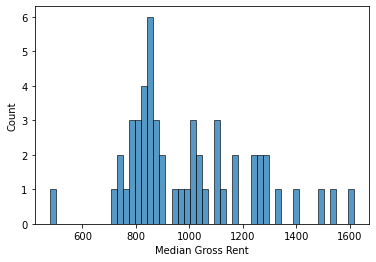

In [21]:
# Now looking at a histogram of median house prices to be sure the data is accurate or at least makes sense
sns.histplot(state_level_full['Median Gross Rent'],bins=50)

In [22]:
# Next steps are to export this to an excel workbook to have some fun with it in Tableau
state_level_full.to_excel('State Level Rental Data - 2019 Census.xlsx',index=False)

In [23]:
# Wouldn't it also be helpful to have this on the county level?  Sure, why not.
# Having already demonstrated the ability to do joins in Pandas dataframes, I'm going to just pull all this data at once.
rental_county = cd.download('acs5', 2019,cd.censusgeo([('state', '*'),('county','*')]),
                                           ['DP04_0126E','DP04_0126PE','DP04_0127PE','DP04_0128PE','DP04_0129PE','DP04_0130PE','DP04_0131PE','DP04_0132PE','DP04_0133PE','DP04_0134E',
                                            'DP04_0137PE','DP04_0138PE','DP04_0139PE','DP04_0140PE','DP04_0141PE','DP04_0142PE'],tabletype='profile')

In [24]:
rental_county_fixed = rental_county.reset_index()

In [25]:
rental_county_fixed.columns = list(['Description','Units Paying Rent','Percentage Paying Rent','Rent < $500 (percentage)','Rent $500 - $999 (percentage)'
                                       ,'Rent $1,000 - $1,499 (percentage)','Rent $1,500 - $1,999 (percentage)','Rent $2,000 - $2,499 (percentage)',
                                       'Rent $2,500 - $2,999 (percentage)','Rent $3,000 + (percentage)','Median Gross Rent',
                                           'Less than 15% of Income','15-19.9% of Income','20-24.9% of Income','25-29.9% of Income','30-34.9% of Income','Greater than 35% of Income'])

In [26]:
rental_county_fixed.head(5)

,Description,Units Paying Rent,Percentage Paying Rent,Rent < $500 (percentage),Rent $500 - $999 (percentage),"Rent $1,000 - $1,499 (percentage)","Rent $1,500 - $1,999 (percentage)","Rent $2,000 - $2,499 (percentage)","Rent $2,500 - $2,999 (percentage)","Rent $3,000 + (percentage)",Median Gross Rent,Less than 15% of Income,15-19.9% of Income,20-24.9% of Income,25-29.9% of Income,30-34.9% of Income,Greater than 35% of Income
0,"Fayette County, Illinois: Summary level: 050, ...",1327,1327,30.0,69.3,0.8,0.0,0.0,0.0,0.0,612,21.8,12.6,10.7,13.5,12.3,29.1
1,"Logan County, Illinois: Summary level: 050, st...",2851,2851,18.2,70.0,10.1,1.2,0.1,0.0,0.5,689,25.8,17.2,13.6,10.7,7.9,24.8
2,"Saline County, Illinois: Summary level: 050, s...",2268,2268,35.1,59.5,4.2,1.0,0.0,0.3,0.0,622,14.3,13.6,13.9,11.7,9.0,37.4
3,"Lake County, Illinois: Summary level: 050, sta...",63946,63946,7.0,27.5,35.8,18.4,6.3,2.8,2.3,1197,13.7,14.2,12.5,11.9,10.4,37.4
4,"Massac County, Illinois: Summary level: 050, s...",1281,1281,28.9,58.3,9.6,2.8,0.4,0.0,0.0,692,13.4,13.3,11.9,9.1,12.8,39.5


In [27]:
# Now, I plan to break the description field into 2 columns: 1 for state, 1 for county.
rental_county_fixed['State/County'] = rental_county_fixed.apply(split,axis=1)

In [28]:
# Creating two new functions to break up the state/county into seperate columns
def county(row):
    return str(row['State/County']).split(',')[0]
def state(row):
    return str(row['State/County']).split(',')[1]

In [29]:
# Adding in those new columns for state & county
rental_county_fixed['State'] = rental_county_fixed.apply(state,axis=1)
rental_county_fixed['County'] = rental_county_fixed.apply(county,axis=1)

In [30]:
rental_county_fixed.head()

,Description,Units Paying Rent,Percentage Paying Rent,Rent < $500 (percentage),Rent $500 - $999 (percentage),"Rent $1,000 - $1,499 (percentage)","Rent $1,500 - $1,999 (percentage)","Rent $2,000 - $2,499 (percentage)","Rent $2,500 - $2,999 (percentage)","Rent $3,000 + (percentage)",Median Gross Rent,Less than 15% of Income,15-19.9% of Income,20-24.9% of Income,25-29.9% of Income,30-34.9% of Income,Greater than 35% of Income,State/County,State,County
0,"Fayette County, Illinois: Summary level: 050, ...",1327,1327,30.0,69.3,0.8,0.0,0.0,0.0,0.0,612,21.8,12.6,10.7,13.5,12.3,29.1,"Fayette County, Illinois",Illinois,Fayette County
1,"Logan County, Illinois: Summary level: 050, st...",2851,2851,18.2,70.0,10.1,1.2,0.1,0.0,0.5,689,25.8,17.2,13.6,10.7,7.9,24.8,"Logan County, Illinois",Illinois,Logan County
2,"Saline County, Illinois: Summary level: 050, s...",2268,2268,35.1,59.5,4.2,1.0,0.0,0.3,0.0,622,14.3,13.6,13.9,11.7,9.0,37.4,"Saline County, Illinois",Illinois,Saline County
3,"Lake County, Illinois: Summary level: 050, sta...",63946,63946,7.0,27.5,35.8,18.4,6.3,2.8,2.3,1197,13.7,14.2,12.5,11.9,10.4,37.4,"Lake County, Illinois",Illinois,Lake County
4,"Massac County, Illinois: Summary level: 050, s...",1281,1281,28.9,58.3,9.6,2.8,0.4,0.0,0.0,692,13.4,13.3,11.9,9.1,12.8,39.5,"Massac County, Illinois",Illinois,Massac County


In [31]:
# Dropping unnessary columns again
rental_county_fixed.drop('Description',axis=1,inplace=True)
rental_county_fixed.drop('State/County',axis=1,inplace=True)

In [38]:
rental_county_fixed.head(5)

,Units Paying Rent,Percentage Paying Rent,Rent < $500 (percentage),Rent $500 - $999 (percentage),"Rent $1,000 - $1,499 (percentage)","Rent $1,500 - $1,999 (percentage)","Rent $2,000 - $2,499 (percentage)","Rent $2,500 - $2,999 (percentage)","Rent $3,000 + (percentage)",Median Gross Rent,Less than 15% of Income,15-19.9% of Income,20-24.9% of Income,25-29.9% of Income,30-34.9% of Income,Greater than 35% of Income,State,County
0,1327,1327,30.0,69.3,0.8,0.0,0.0,0.0,0.0,612,21.8,12.6,10.7,13.5,12.3,29.1,Illinois,Fayette County
1,2851,2851,18.2,70.0,10.1,1.2,0.1,0.0,0.5,689,25.8,17.2,13.6,10.7,7.9,24.8,Illinois,Logan County
2,2268,2268,35.1,59.5,4.2,1.0,0.0,0.3,0.0,622,14.3,13.6,13.9,11.7,9.0,37.4,Illinois,Saline County
3,63946,63946,7.0,27.5,35.8,18.4,6.3,2.8,2.3,1197,13.7,14.2,12.5,11.9,10.4,37.4,Illinois,Lake County
4,1281,1281,28.9,58.3,9.6,2.8,0.4,0.0,0.0,692,13.4,13.3,11.9,9.1,12.8,39.5,Illinois,Massac County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,1322,1322,13.2,71.6,14.4,0.9,0.0,0.0,0.0,728,19.7,8.0,12.9,6.2,14.5,38.7,Tennessee,Crockett County
3216,824,824,46.4,49.0,4.1,0.4,0.0,0.0,0.1,519,32.4,9.7,8.5,4.5,9.6,35.3,Tennessee,Lake County
3217,62695,62695,12.7,50.3,28.0,6.4,1.6,0.4,0.6,892,12.8,13.2,13.4,13.1,9.0,38.5,Tennessee,Knox County
3218,21360,21360,7.9,45.5,34.4,8.0,2.4,0.6,1.2,974,16.0,13.8,14.0,11.2,8.3,36.7,Washington,Benton County


In [48]:
# Doing the same thing to check for missing values
#plt.figure(figsize=[8,6])
#msno.matrix(rental_county_fixed)

<AxesSubplot:xlabel='Median Gross Rent', ylabel='Count'>

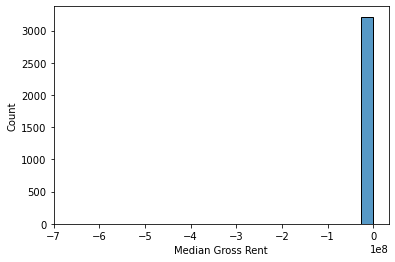

In [41]:
# Also checking a histogram to see if this data makes sense as well
sns.histplot(rental_county_fixed['Median Gross Rent'],bins=25)

In [42]:
# I've run into this before, the values are being massively skewed causing this weird distribution.  Looking at the lowest value to see what is going on
min(rental_county_fixed['Median Gross Rent'])

-666666666

In [43]:
# Looking at the max to be sure I'm not going crazy, but it looks like they are using a massive neg value in place of null.  Checking the max to be sure it at least makes sense
max(rental_county_fixed['Median Gross Rent'])

2316

In [44]:
# Max makes sense, here it makes sense to completely remove rows with this value since we don't have data on them.  We know they are paying some amount of money on rent, so replacing nulls with a zero doesn't make sense here
# Filtering out any rows with a zero here since we lack the data
rental_county_final = rental_county_fixed[rental_county_fixed['Median Gross Rent'] > 0]

<AxesSubplot:xlabel='Median Gross Rent', ylabel='Count'>

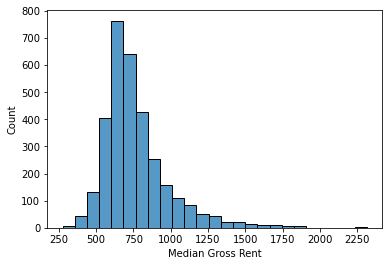

In [45]:
# Trying the histogram again
sns.histplot(rental_county_final['Median Gross Rent'],bins=25)

In [46]:
# Dartmouth Rules! Just kidding, that was to see if you are reading any of this
# Lastly, exporting this for further analysis in Tableau.  
rental_county_final.to_excel('County Level Rental Data - 2019 Census.xlsx',index=False)